# Big Mart Sales Prediction 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/LAKSHYA/Documents/ML/bigmartsales.csv')

## Dataset description

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [4]:
df.shape

(8523, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


## Data Manipulation

### 1.Removing null values

In [7]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64


In [8]:
dataset=df.dropna()
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,556.6088,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8,OUT046,1997,Small,Tier1,Supermarket Type1,3608.6360,13.2
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [9]:
print(dataset.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64


### 2.Sorting

In [10]:
df_sorted=dataset.sort_values(['Item_MRP','Item_Weight'],ascending=True)
df_sorted.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
6958,DRK12,9.500,Low Fat,0.041851,Soft Drinks,31.5,OUT013,1987,High,Tier 3,Supermarket Type1,466.0600,12.2
2135,DRK12,9.500,Low Fat,0.042057,Soft Drinks,31.9,OUT018,2009,Medium,Tier 2,Supermarket Type2,366.1900,14.4
2011,FDX59,10.195,Low Fat,0.051618,Breads,32.0,OUT013,1987,High,Tier 3,Supermarket Type1,373.5138,14.3
5341,FDV28,16.100,Regular,0.159698,Frozen Foods,32.1,OUT035,2004,Small,Tier1,Supermarket Type1,1018.6740,13.4
1209,FDU21,11.800,reg,0.076657,Snack Foods,32.4,OUT013,1987,High,Tier 3,Supermarket Type1,169.7790,12.0


### 3.Filtering

In [11]:
profit=df_sorted['Profit']>14
profit

6958    False
2135     True
2011     True
5341    False
1209    False
        ...  
3416    False
4877     True
5558     True
5254     True
5884    False
Name: Profit, Length: 5364, dtype: bool

In [12]:
df_sorted[profit]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
2135,DRK12,9.500,Low Fat,0.042057,Soft Drinks,31.9,OUT018,2009,Medium,Tier 2,Supermarket Type2,366.1900,14.4
2011,FDX59,10.195,Low Fat,0.051618,Breads,32.0,OUT013,1987,High,Tier 3,Supermarket Type1,373.5138,14.3
4304,DRK12,9.500,Low Fat,0.041951,Soft Drinks,32.5,OUT049,1999,Medium,Tier 2,Supermarket Type1,865.5400,14.1
2711,NCO06,19.250,Low Fat,0.108030,Household,32.5,OUT046,1997,Small,Tier1,Supermarket Type1,101.8674,14.2
6600,NCE31,7.670,Low Fat,0.185131,Household,32.9,OUT049,1999,Medium,Tier 2,Supermarket Type1,588.5672,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,FDB15,10.895,Low Fat,0.136785,Dairy,265.3,OUT035,2004,Small,Tier1,Supermarket Type1,4218.5088,14.2
4195,FDK51,19.850,Low Fat,0.005235,Dairy,265.9,OUT046,1997,Small,Tier1,Supermarket Type1,2649.8840,14.2
4877,NCS29,9.000,Low Fat,0.069654,Health and Hygiene,266.3,OUT049,1999,Medium,Tier 2,Supermarket Type1,2914.8724,14.4
5558,NCS29,9.000,Low Fat,0.069532,Health and Hygiene,266.6,OUT035,2004,Small,Tier1,Supermarket Type1,6624.7100,14.1


### 4.Duplicating

In [13]:
duplicate_rows_df = df_sorted[df_sorted.duplicated()]
print(f"number of duplicate rows:{ duplicate_rows_df.shape}")

number of duplicate rows:(0, 13)


### 5.Sampling

In [14]:
sample_row=df_sorted.sample(n=10)
sample_row

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
1994,NCX29,10.000,Low Fat,0.089136,Health and Hygiene,146.9,OUT035,2004,Small,Tier1,Supermarket Type1,3207.8244,13.6
7034,FDE09,8.775,Low Fat,0.000000,Fruits and Vegetables,111.3,OUT049,1999,Medium,Tier 2,Supermarket Type1,1436.7964,13.7
6216,FDZ46,7.485,Low Fat,0.069405,Snack Foods,112.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1105.2280,14.0
5815,FDT57,15.200,Low Fat,0.019031,Snack Foods,235.5,OUT035,2004,Small,Tier1,Supermarket Type1,4740.4960,8.4
7280,FDY48,14.000,Low Fat,0.023715,Baking Goods,103.8,OUT013,1987,High,Tier 3,Supermarket Type1,1743.0644,13.4
3232,FDE21,12.800,Low Fat,0.022980,Fruits and Vegetables,117.7,OUT049,1999,Medium,Tier 2,Supermarket Type1,1274.3412,12.9
1726,FDS12,9.100,Low Fat,0.173974,Baking Goods,126.5,OUT013,1987,High,Tier 3,Supermarket Type1,1761.7068,14.5
6619,FDX52,11.500,Regular,0.042174,Frozen Foods,194.7,OUT018,2009,Medium,Tier 2,Supermarket Type2,2316.9840,12.9
677,NCQ05,11.395,LF,0.000000,Health and Hygiene,151.7,OUT013,1987,High,Tier 3,Supermarket Type1,3460.8284,12.4
128,DRG23,8.880,Low Fat,0.086709,Hard Drinks,151.8,OUT013,1987,High,Tier 3,Supermarket Type1,762.3410,13.8


In [15]:
q=df_sorted.sample(frac=0.25)
q

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
5470,FDC40,16.000,Regular,0.065329,Dairy,78.5,OUT018,2009,Medium,Tier 2,Supermarket Type2,1791.6678,14.6
4747,FDG33,5.365,Regular,0.140458,Seafood,169.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3263.7516,11.6
44,FDL50,12.150,Regular,0.042278,Canned,126.5,OUT013,1987,High,Tier 3,Supermarket Type1,373.5138,14.3
7704,NCI29,8.600,Low Fat,0.032672,Health and Hygiene,141.2,OUT049,1999,Medium,Tier 2,Supermarket Type1,709.0770,13.7
1448,FDO46,9.600,Regular,0.014270,Snack Foods,187.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,2647.2208,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,FDU12,15.500,Regular,0.075688,Baking Goods,263.0,OUT013,1987,High,Tier 3,Supermarket Type1,1845.5976,14.4
5905,FDG16,15.250,Low Fat,0.089817,Frozen Foods,217.3,OUT046,1997,Small,Tier1,Supermarket Type1,5608.6992,13.0
3251,FDE26,9.300,Low Fat,0.089006,Canned,144.0,OUT046,1997,Small,Tier1,Supermarket Type1,2745.0934,14.8
8276,DRH13,8.575,Low Fat,0.023886,Soft Drinks,106.6,OUT046,1997,Small,Tier1,Supermarket Type1,958.7520,14.5


### 6.Data type conversion

In [16]:
q.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

In [17]:
q.astype({'Item_Outlet_Sales':'int64'}).dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales              int64
Profit                       float64
dtype: object

In [18]:
q.astype({'Item_Outlet_Sales':'int64'})

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
5470,FDC40,16.000,Regular,0.065329,Dairy,78.5,OUT018,2009,Medium,Tier 2,Supermarket Type2,1791,14.6
4747,FDG33,5.365,Regular,0.140458,Seafood,169.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3263,11.6
44,FDL50,12.150,Regular,0.042278,Canned,126.5,OUT013,1987,High,Tier 3,Supermarket Type1,373,14.3
7704,NCI29,8.600,Low Fat,0.032672,Health and Hygiene,141.2,OUT049,1999,Medium,Tier 2,Supermarket Type1,709,13.7
1448,FDO46,9.600,Regular,0.014270,Snack Foods,187.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,2647,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,FDU12,15.500,Regular,0.075688,Baking Goods,263.0,OUT013,1987,High,Tier 3,Supermarket Type1,1845,14.4
5905,FDG16,15.250,Low Fat,0.089817,Frozen Foods,217.3,OUT046,1997,Small,Tier1,Supermarket Type1,5608,13.0
3251,FDE26,9.300,Low Fat,0.089006,Canned,144.0,OUT046,1997,Small,Tier1,Supermarket Type1,2745,14.8
8276,DRH13,8.575,Low Fat,0.023886,Soft Drinks,106.6,OUT046,1997,Small,Tier1,Supermarket Type1,958,14.5


### 7.Formating

In [19]:
q.head(21).style.format({"Item_Visibility": "{:.3f}"})

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
5470,FDC40,16.000000,Regular,0.065,Dairy,78.500000,OUT018,2009,Medium,Tier 2,Supermarket Type2,1791.667800,14.600000
4747,FDG33,5.365000,Regular,0.140,Seafood,169.800000,OUT049,1999,Medium,Tier 2,Supermarket Type1,3263.751600,11.600000
44,FDL50,12.150000,Regular,0.042,Canned,126.500000,OUT013,1987,High,Tier 3,Supermarket Type1,373.513800,14.300000
7704,NCI29,8.600000,Low Fat,0.033,Health and Hygiene,141.200000,OUT049,1999,Medium,Tier 2,Supermarket Type1,709.077000,13.700000
1448,FDO46,9.600000,Regular,0.014,Snack Foods,187.400000,OUT018,2009,Medium,Tier 2,Supermarket Type2,2647.220800,12.800000
6176,FDZ07,15.100000,reg,0.094,Fruits and Vegetables,62.300000,OUT049,1999,Medium,Tier 2,Supermarket Type1,495.355200,14.300000
7296,NCB42,11.800000,LF,0.009,Health and Hygiene,116.900000,OUT013,1987,High,Tier 3,Supermarket Type1,1969.436400,14.400000
4216,FDP25,15.200000,Low Fat,0.021,Canned,219.500000,OUT046,1997,Small,Tier1,Supermarket Type1,1747.059200,9.200000
3281,NCY30,20.250000,Low Fat,0.026,Household,180.100000,OUT035,2004,Small,Tier1,Supermarket Type1,3440.854400,14.600000
1219,FDA02,14.000000,Regular,0.030,Dairy,144.000000,OUT018,2009,Medium,Tier 2,Supermarket Type2,866.871600,14.400000


## Data Visualization

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

### 1.Bar graph

In [21]:
q=q.astype({'Profit':'int64'})

Text(0.5, 0, 'Profit')

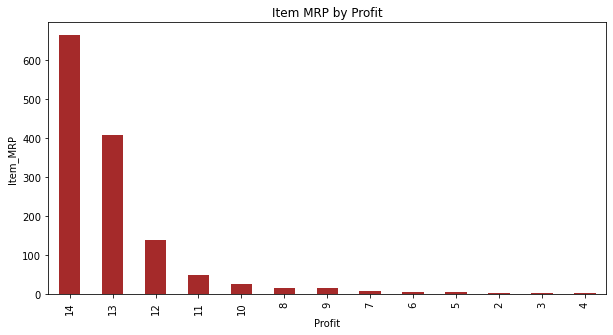

In [22]:
q.Profit.value_counts().plot(kind='bar', figsize=(10,5),color="brown")
plt.title("Item MRP by Profit")
plt.ylabel("Item_MRP")
plt.xlabel("Profit")

### 2.Box plot

<AxesSubplot:xlabel='Item_Outlet_Sales'>

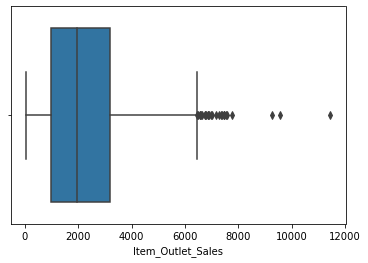

In [23]:
sns.boxplot(x=q["Item_Outlet_Sales"])

### 3.Heat map 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.093216,0.016133,0.410791,-0.022824,0.022275
Item_Visibility,-0.093216,1.000000,0.021649,-0.043352,-0.052377,-0.022613
Item_MRP,0.016133,0.021649,1.000000,-0.009037,0.626191,-0.039449
Outlet_Establishment_Year,0.410791,-0.043352,-0.009037,1.000000,-0.035996,-0.030052
Item_Outlet_Sales,-0.022824,-0.052377,0.626191,-0.035996,1.000000,-0.061282
Profit,0.022275,-0.022613,-0.039449,-0.030052,-0.061282,1.000000


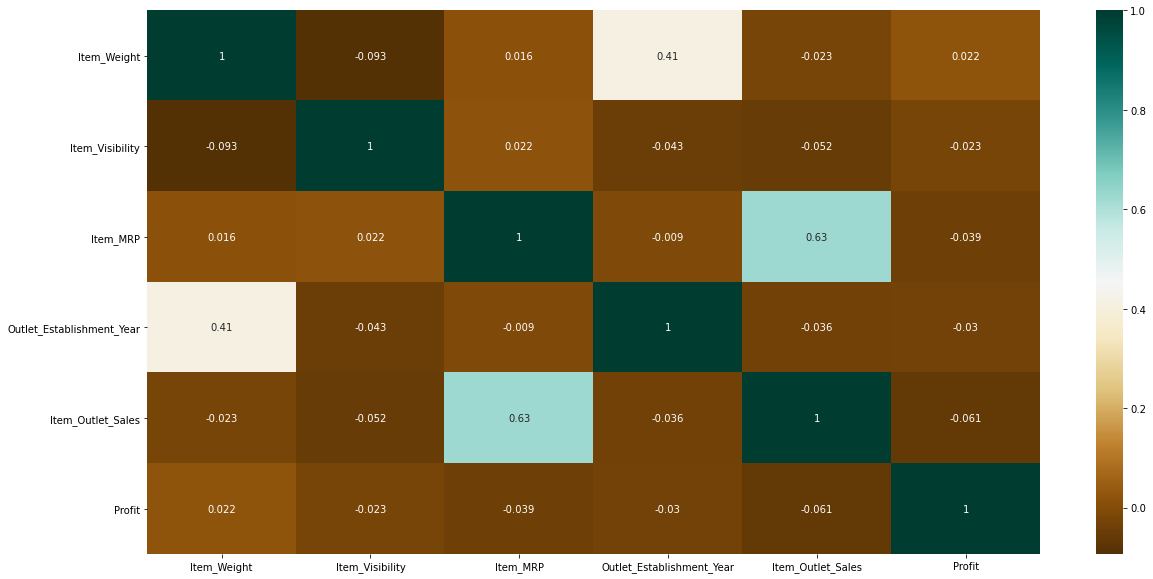

In [24]:
plt.figure(figsize=(20,10))
c= q.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### 4.Scatter Plot

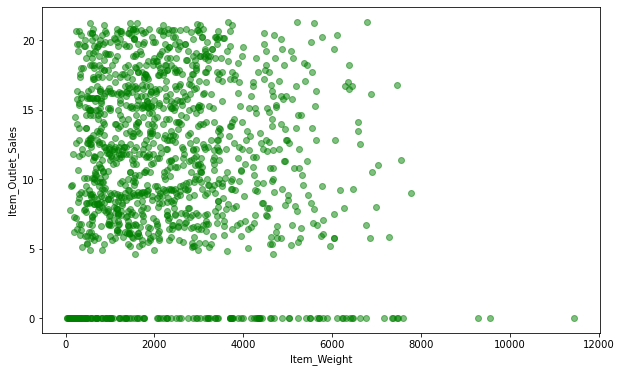

In [25]:
fig, ax = plt.subplots(figsize=(10,6))  
plt.scatter(q["Item_Outlet_Sales"], q["Item_Weight"],color="green",alpha=0.5)
plt.ylabel("Item_Outlet_Sales")
plt.xlabel("Item_Weight")
plt.show()

### 5.Line graph

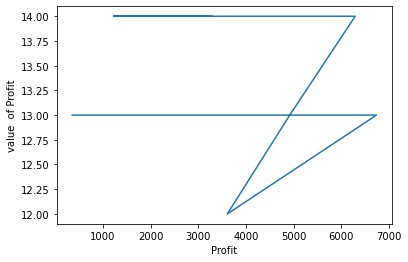

In [26]:
plt.plot(q["Profit"][8:15])
plt.ylabel('value  of Profit')
plt.xlabel("Profit")
plt.show()

### 6.Pie chart

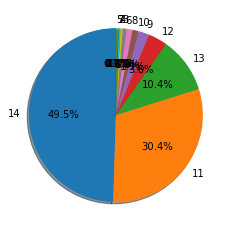

In [27]:
labels = q.Profit.unique()
sizes = q.Profit.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

### 7.Histogram plot

(array([ 2., 31., 59., 66., 73., 61., 84., 46., 49., 57., 66., 57., 47.,
        57., 50., 76., 36., 68., 52., 48.]),
 array([ 4. ,  4.8,  5.6,  6.4,  7.2,  8. ,  8.8,  9.6, 10.4, 11.2, 12. ,
        12.8, 13.6, 14.4, 15.2, 16. , 16.8, 17.6, 18.4, 19.2, 20. ]),
 <BarContainer object of 20 artists>)

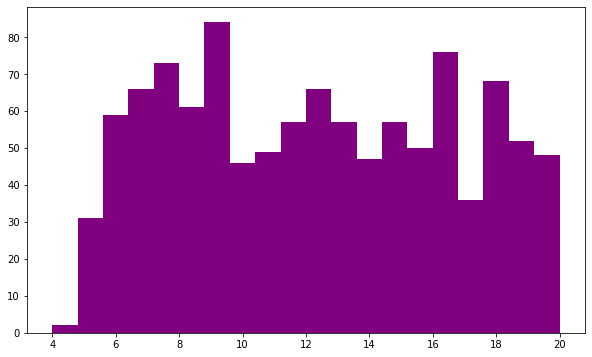

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(q["Item_Weight"],bins= 20,range=[4,20],color="purple")
#plt.show()

## Data cleaning

In [29]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [30]:
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [31]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
df.Outlet_Size = df.Outlet_Size.fillna('Medium')

In [33]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [34]:
df=df.drop('Outlet_Location_Type',axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Supermarket Type1,994.7052,14.1


## Model Building

In [35]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
from sklearn.preprocessing import LabelEncoder

df=df.apply(LabelEncoder().fit_transform)

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Profit
0,156,285,1,664,4,1938,9,4,1,1,2540,98
1,8,58,2,880,14,159,3,8,1,2,422,126
2,662,377,1,715,10,968,9,4,1,1,1639,128
3,1121,394,2,0,6,1367,0,3,1,0,670,119
4,1297,266,1,0,9,215,1,1,0,1,865,124


In [38]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df.Item_Outlet_Sales

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [40]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Profit
88,674,82,2,6669,13,562,8,2,2,1,117
6813,1190,62,1,3032,6,1020,2,7,1,1,122
4046,1340,0,1,4754,9,1158,5,0,1,3,115
8194,1179,0,2,7867,4,1129,4,0,2,0,101
8293,1494,277,1,5203,9,149,6,6,2,1,110


In [41]:
y_train.head()

88       615
6813    1414
4046    2514
8194     444
8293     762
Name: Item_Outlet_Sales, dtype: int64

## Linear regression model:

In [42]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test)
y_pred

array([1815.14596141, 1654.76858208, 1296.73628733, ..., 1706.47823433,
       1445.76861223, 1568.65327493])

In [44]:
dframe= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dframe

,Actual,Predicted
4931,1188,1815.145961
4148,1023,1654.768582
7423,1458,1296.736287
4836,1835,1370.815949
944,1269,1871.619197
...,...,...
5460,2172,2279.152493
7384,1686,2207.469242
1336,1554,1706.478234
8455,2725,1445.768612


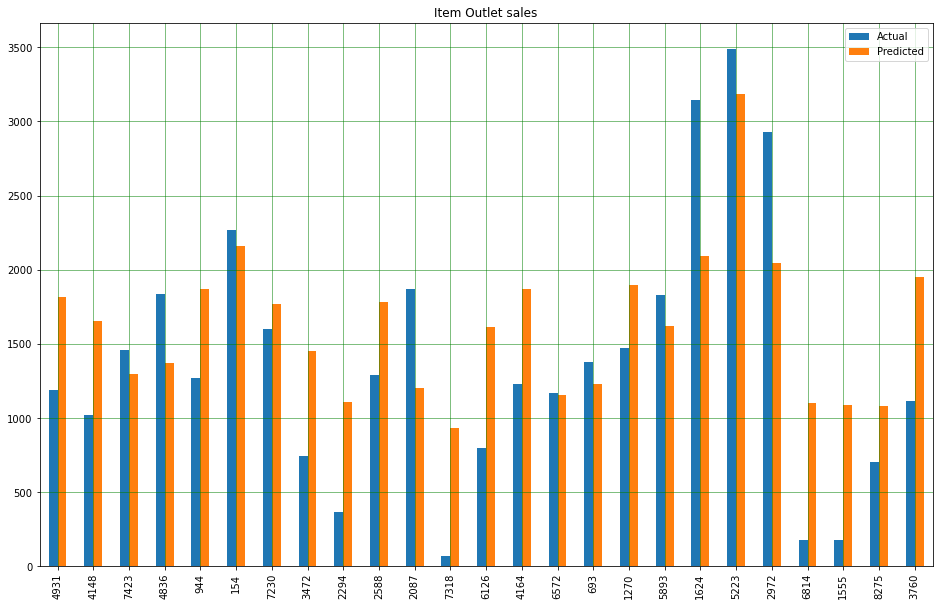

In [45]:
df1 = dframe.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Item Outlet sales")
plt.show()

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 509.2012927932286
Mean Squared Error: 400809.06122844556
Root Mean Squared Error: 633.0948279905986


In [47]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

55.64

In [48]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.54


In [49]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",regressor.score(X_train, y_train))

RMSE : 633.0948279905986
Variance score: 0.54
Result : 0.5563766003956208


## Ridge regression model:

In [50]:
from sklearn.linear_model import Ridge

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print(f'Score of Linear regression: {test_score}')

Score of Linear regression: 0.5414604607738192


In [53]:
rr = Ridge(alpha=0.01) 

In [54]:
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [55]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_test_score

0.5414604430598479

In [56]:
rr75 = Ridge(alpha=75) #  comparison with alpha value
rr75.fit(X_train, y_train)

Ridge(alpha=75)

In [57]:
Ridge_train_score75 = rr75.score(X_train,y_train)
Ridge_test_score75 = rr75.score(X_test, y_test)
Ridge_test_score75

0.541260402049305

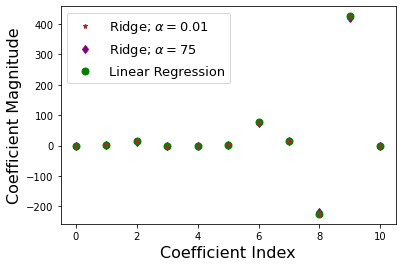

In [58]:
plt.plot(rr.coef_,linestyle='none',marker='*',markersize=5,color='brown',label=r'Ridge; $\alpha = 0.01$',zorder=8)
plt.plot(rr75.coef_,linestyle='none',marker='d',markersize=6,color='purple',label=r'Ridge; $\alpha = 75$')
plt.plot(lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')
plt.show()

In [59]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",lr.score(X_train, y_train))

RMSE : 633.0948279905986
Variance score: 0.54
Result : 0.5563766003956208


## Naive bayes model:

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Profit
88,674,82,2,6669,13,562,8,2,2,1,117
6813,1190,62,1,3032,6,1020,2,7,1,1,122
4046,1340,0,1,4754,9,1158,5,0,1,3,115
8194,1179,0,2,7867,4,1129,4,0,2,0,101
8293,1494,277,1,5203,9,149,6,6,2,1,110


In [62]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [63]:
y_pred=model.predict(X_test)
y_pred

array([1663, 1344, 1340, ..., 1050,  711,  559], dtype=int64)

In [64]:
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

0.1564333202972233

In [65]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(X_train, y_train))

RMSE : 841.5856026302708
Variance score: 0.19
Result : 0.4852497485752598
